<h1>Importing Required Libraries</h1>

In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

<h1>Importing Kaggle to get dataset</h1>
<a href="https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format">https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format</a>

In [47]:
pip install kaggle

In [48]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 70 bytes
az-handwritten-alphabets-in-csv-format.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!unzip az-handwritten-alphabets-in-csv-format.zip

Archive:  az-handwritten-alphabets-in-csv-format.zip
replace A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace A_Z Handwritten Data/A_Z Handwritten Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [50]:
data = pd.read_csv("/content/A_Z Handwritten Data/A_Z Handwritten Data.csv")
data.head() 

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Splitting the Data into Images and Labels</h2>

In [51]:
X = data.drop('0',axis = 1) # axis=1 for dropping column
y = data['0']

<h2>Splitting the Data into Train and Test Sets</h2>

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

<h2>Reshaping the data into the format of Images</h2>

In [53]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

<h2>Encoding English Alphabets to Number from 0-25</h2>

In [54]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

<h2>Display number of letters</h2>

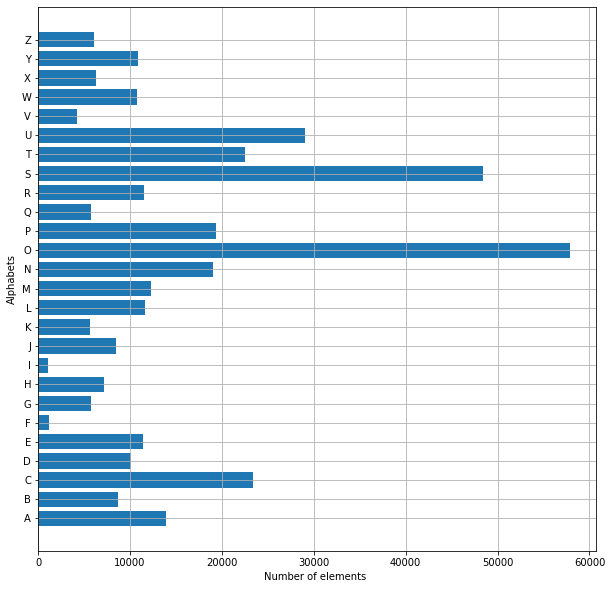

In [55]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') 
for i in y_int:
    count[i] +=1 

alphabets = []
for i in encode.values():
    alphabets.append(i) 

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

<h2>Making the data suitable for the CNN</h2>

In [56]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_test.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


<h2>Converting the Values to Categorical Variables</h2>

In [57]:
train_yOHE = to_categorical(Y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(Y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [58]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.08),
  layers.experimental.preprocessing.RandomContrast(0.12),
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.05,0.1))
])

<h2>Creating the CNN</h2>


In [74]:
model = Sequential()
model.add(data_augmentation)
#CNN
# input -> conv -> maxpool -> conv -> maxpool ......->flattened vector-> 
#.                        hidden layer -> hidden layer -> softmax layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [75]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 2, 2, 128)      

<h2>Compiling the Model</h2>

In [61]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

<h2>Starting the Training</h2>


In [62]:
history = model.fit(X_train, train_yOHE, epochs=10,  validation_data = (X_test,test_yOHE))

Epoch 1/10
9312/9312 [==============================] - 40s 4ms/step - loss: 0.1580 - accuracy: 0.9564 - val_loss: 0.0951 - val_accuracy: 0.9725
Epoch 2/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0713 - accuracy: 0.9801 - val_loss: 0.0677 - val_accuracy: 0.9822
Epoch 3/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0597 - accuracy: 0.9835 - val_loss: 0.0753 - val_accuracy: 0.9810
Epoch 4/10
9312/9312 [==============================] - 37s 4ms/step - loss: 0.0557 - accuracy: 0.9850 - val_loss: 0.0650 - val_accuracy: 0.9839
Epoch 5/10
9312/9312 [==============================] - 43s 5ms/step - loss: 0.0513 - accuracy: 0.9859 - val_loss: 0.0662 - val_accuracy: 0.9824
Epoch 6/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0503 - accuracy: 0.9867 - val_loss: 0.0591 - val_accuracy: 0.9853
Epoch 7/10
9312/9312 [==============================] - 38s 4ms/step - loss: 0.0491 - accuracy: 0.9872 - val_loss: 0.0655 - val_ac

<h2>Making Predictions</h2>

In [63]:
model.evaluate(X_test, np.array(test_yOHE))

2328/2328 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9857


[0.06420440971851349, 0.9857430458068848]

In [64]:
predictions = model.predict(
      x=X_test
    , batch_size=30
    , verbose=0
)

In [65]:
rounded_predictions = np.argmax(predictions, axis=-1)

<h2>Display accuracy and loss</h2>

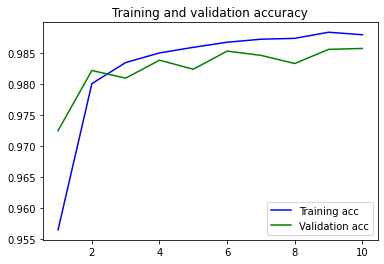

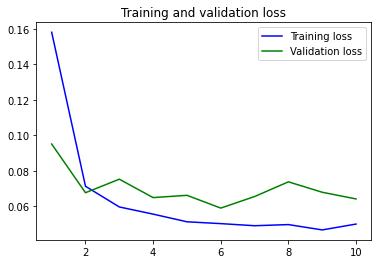

In [66]:
def training_plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

training_plot(history)

<h2>Creating Confusion Matrix</h2>

In [67]:
def plot_confusion_matrix(cm, classes,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.figure(figsize=(15,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [68]:
cm = confusion_matrix(y_true=Y_test, y_pred=rounded_predictions)

In [69]:
cm_plot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

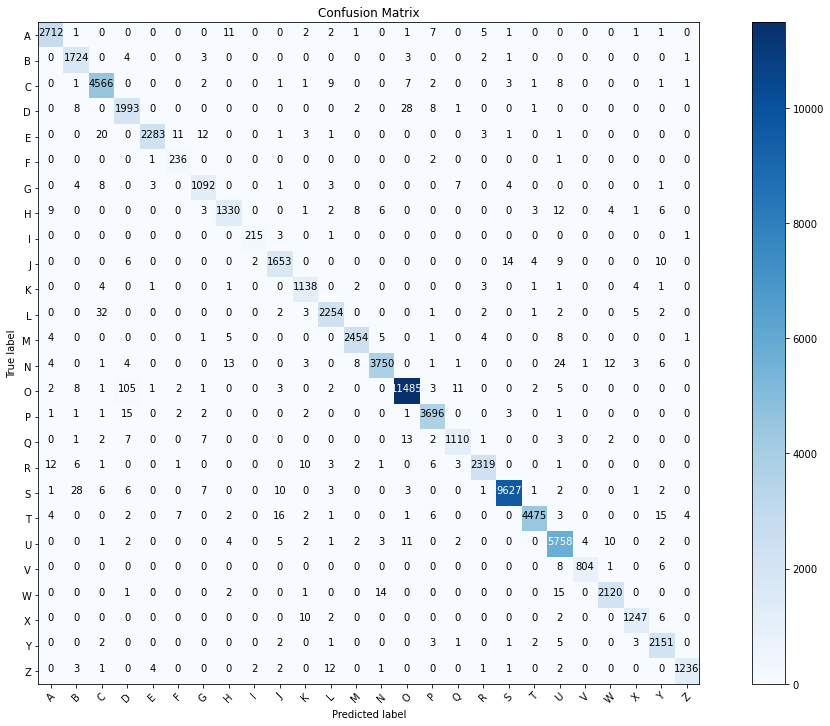

In [70]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

<h2>Typical errors</h2>
<h3>We can notice that the model is trained well enough, that's why there are not many errors. But still there are enough cases where there were mix-ups O-D and N-H</h3>

<h2>Test Predictions</h2>

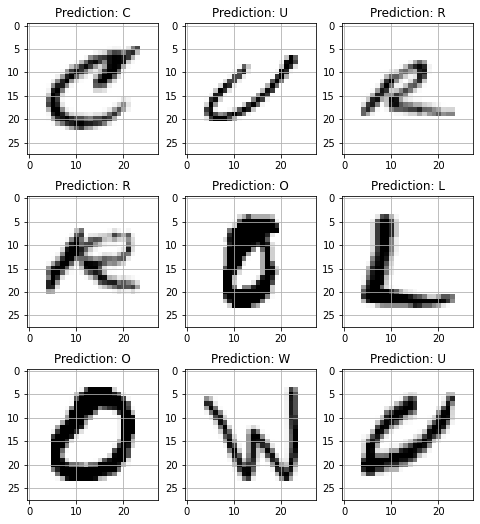

In [71]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = encode[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()